<h3> Data Cleaning and Data Wrangling </h3>
Daily and hourly datasets for 2011 and 2022 <br><br>

Datasets from: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset





In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math

In [2]:
df_daily = pd.read_csv('data/day.csv')
df_hourly = pd.read_csv('data/hour.csv')

In [3]:
df_daily.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [4]:
df_daily.tail(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


Appears to be data for every day from 2011-01-01 to 2012-12-31 <br>

2012 was a leap year, which is why it had 366 days. <br>

We have correct total number of days (365 + 366 = 731)

"season": (1:winter, 2:spring, 3:summer, 4:fall) <br>
"yr" : year (0: 2011, 1:2012)<br>
"mnth" : month ( 1 to 12)<br>
"holiday": public holiday (1) or not (0) <br>
"weekday": sunday = 0, monday = 1, etc <br>
"workingday": 1: yes, 0: weekend or holiday <br>
"weathersit" : 1: good, 4: terrible <br>
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>

"temp":  Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale) <br>
(so t = temp * (t_max - t_min) + t_min)

"atemp": Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) <br>

"hum": Normalized humidity. The values are divided to 100 (max) <br>

"windspeed": Normalized wind speed. The values are divided to 67 (max) <br>

"casual": count of casual users <br>

"registered": count of registered users <br>

"cnt": "casual" + "registered"


In [5]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Drop redundant column in daily data
df_daily.drop('instant', axis = 1, inplace = True)

In [7]:
df_daily.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [8]:
# Rename column labels in df_day to make them more readable

columns = {'dteday':'date',
            'yr': 'year',
            'mnth': 'month',
            'weekday':'day_of_week',
            'workingday': 'work_day',
            'weathersit': 'weather_sit',
            'atemp': 'app_temp',
            'hum': 'humidity',
            'windspeed': 'wind_speed',
            'cnt': 'total'
            }

df_daily.rename(columns = columns, inplace = True)

In [9]:
df_daily.head(2)

,date,season,year,month,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [10]:
df_daily.shape

(731, 15)

In [11]:
df_daily.isna().sum()

date           0
season         0
year           0
month          0
holiday        0
day_of_week    0
work_day       0
weather_sit    0
temp           0
app_temp       0
humidity       0
wind_speed     0
casual         0
registered     0
total          0
dtype: int64

In [12]:
df_daily.duplicated().sum()

0

Great. No missing values and no duplicates.

In [13]:
# Drop redundant column in hourly data
df_hourly.drop('instant', axis = 1, inplace = True)

In [14]:
df_hourly.head(2)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [15]:
df_hourly.shape

(17379, 16)

In [16]:
# Calculate how many rows are missing from df_hour
# For every row in df_day, there should be 24 rows in df_hour
(df_daily.shape[0] * 24) - (df_hourly.shape[0])

165

We have 165 rows missing from df_hour

In [17]:
# Rename column labels in df_hourly to make them more readable

columns = {'dteday':'date',
            'yr': 'year',
            'mnth': 'month',
            'weekday':'day_of_week',
            'workingday': 'work_day',
            'weathersit': 'weather_sit',
            'atemp': 'app_temp',
            'hum': 'humidity',
            'windspeed': 'wind_speed',
            'cnt': 'total'
            }

df_hourly.rename(columns = columns, inplace = True)

In [18]:
df_hourly.head(2)

,date,season,year,month,hr,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [19]:
df_hourly.rename(columns = {'hr':'hour'}, inplace = True)

In [20]:
df_hourly.head(2)

,date,season,year,month,hour,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [21]:
df_hourly.isna().sum()

date           0
season         0
year           0
month          0
hour           0
holiday        0
day_of_week    0
work_day       0
weather_sit    0
temp           0
app_temp       0
humidity       0
wind_speed     0
casual         0
registered     0
total          0
dtype: int64

In [22]:
df_hourly.duplicated().sum()

0

In [23]:
df_daily [df_daily['holiday'] == 1].head(5)

,date,season,year,month,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total
16,2011-01-17,1,0,1,1,1,0,2,0.175833,0.176771,0.537500,0.194017,117,883,1000
51,2011-02-21,1,0,2,1,1,0,2,0.303333,0.284075,0.605000,0.307846,195,912,1107
104,2011-04-15,2,0,4,1,5,0,1,0.446667,0.441913,0.671250,0.226375,642,2484,3126
149,2011-05-30,2,0,5,1,1,0,1,0.733333,0.671092,0.685000,0.131225,1549,2549,4098
184,2011-07-04,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,2978,6043


In [24]:
df_daily['holiday'] = df_daily['holiday'].apply(lambda x: 'no' if x == 0 else 'yes')
df_hourly['holiday'] = df_hourly['holiday'].apply(lambda x: 'no' if x == 0 else 'yes')

In [25]:
df_daily.head(2)
df_hourly.head(2)


,date,season,year,month,hour,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total
0,2011-01-01,1,0,1,0,no,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,no,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


Now change day_of_week to 'mon', 'tue', etc. 

In [26]:
# "weekday": 
# sunday = 0 
# monday = 1
# tuesday = 2
# etc

df_daily ['day_of_week'] = df_daily['day_of_week'].apply(lambda x: 'sun' if x == 0
                                                            else 'mon' if x == 1
                                                            else 'tue' if x == 2
                                                            else 'wed' if x == 3
                                                            else 'thu' if x == 4
                                                            else 'fri' if x == 5
                                                            else 'sat')

df_hourly ['day_of_week'] = df_hourly['day_of_week'].apply(lambda x: 'sun' if x == 0
                                                            else 'mon' if x == 1
                                                            else 'tue' if x == 2
                                                            else 'wed' if x == 3
                                                            else 'thu' if x == 4
                                                            else 'fri' if x == 5
                                                            else 'sat')

In [27]:

# Denormalise temperature. 
# Normalised temperatures are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale) 
# So to denormalise: t = temp * (t_max - t_min) + t_min)

t_min = -8.0
t_max = 39.0

df_daily['temp'] = df_daily['temp'].apply(lambda x: round (x * (t_max - t_min) + t_min, 1) )
df_hourly['temp'] = df_hourly['temp'].apply(lambda x: round (x * (t_max - t_min) + t_min, 1))

In [28]:

# Denormalise apparent temperature. 
# Normalised apparent temperatures are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
# So to denormalise: t = temp * (t_max - t_min) + t_min)

t_min = -16.0
t_max = 50.0

df_daily['app_temp'] = df_daily['app_temp'].apply(lambda x: round (x * (t_max - t_min) + t_min, 1) )
df_hourly['app_temp'] = df_hourly['app_temp'].apply(lambda x: round (x * (t_max - t_min) + t_min, 1))


In [29]:
"""
"hum": Normalized humidity. The values are divided to 100 (max) <br>

"windspeed": Normalized wind speed. The values are divided to 67 (max) <br>
"""

df_daily['humidity'] = df_daily['humidity'].apply(lambda x: round (x * 100, 1) )
df_hourly['humidity'] = df_hourly['humidity'].apply(lambda x: round (x * 100, 1))

df_daily['wind_speed'] = df_daily['wind_speed'].apply(lambda x: round (x * 67, 1) )
df_hourly['wind_speed'] = df_hourly['wind_speed'].apply(lambda x: round (x * 67, 1))

In [30]:
# convert 'date' columns to date-time format
df_daily['date'] = pd.to_datetime(df_daily['date'])
df_hourly['date'] = pd.to_datetime(df_hourly['date'])

In [31]:
# convert work_day column values to "yes" or "no"
df_daily['work_day'] = df_daily['work_day'].apply(lambda x: 'yes' if x == 1 else 'no')
df_hourly['work_day'] = df_hourly['work_day'].apply(lambda x: 'yes' if x == 1 else 'no')

In [32]:
# Create 'year' column
df_daily['year'] = df_daily['date'].dt.year
df_hourly['year'] = df_hourly['date'].dt.year

In [33]:
# Change "weather_sit" column

# 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

# Rename as follows: 

# 1: Clear
# 2: Misty
# 3: Bit wet
# 4: Very wet


df_daily['weather_sit'] = df_daily['weather_sit'].apply(lambda x: 'clear' if x == 1
                                                                else 'misty' if x == 2
                                                                else 'bit wet' if x == 3
                                                                else 'very wet')

df_hourly['weather_sit'] = df_hourly['weather_sit'].apply(lambda x: 'clear' if x == 1
                                                                else 'misty' if x == 2
                                                                else 'bit wet' if x == 3
                                                                else 'very wet')

In [34]:
# Convert "season" values to strings
# (1:winter, 2:spring, 3:summer, 4:fall)

df_daily['season'] = df_daily['season'].apply(lambda x: 'winter' if x == 1
                                                    else 'spring' if x == 2
                                                    else 'summer' if x == 3
                                                    else 'autumn')

In [35]:
# "season": (1:winter, 2:spring, 3:summer, 4:fall)

df_hourly['season'] = df_hourly['season'].apply(lambda x: 'winter' if x == 1
                                                    else 'spring' if x == 2
                                                    else 'summer' if x == 3
                                                    else 'autumn')

In [36]:
# Check the boundaries for the seasons in 2011

spring_first = df_daily [(df_daily['date'].dt.year == 2011) & (df_daily['season'] == 'spring')].iloc[0]['date']
spring_last = df_daily [(df_daily['date'].dt.year == 2011) & (df_daily['season'] == 'spring')].iloc[-1]['date']

summer_first = df_daily [(df_daily['date'].dt.year == 2011) & (df_daily['season'] == 'summer')].iloc[0]['date']
summer_last = df_daily [(df_daily['date'].dt.year == 2011) & (df_daily['season'] == 'summer')].iloc[-1]['date']

autumn_first = df_daily [(df_daily['date'].dt.year == 2011) & (df_daily['season'] == 'autumn')].iloc[0]['date']
autumn_last = df_daily [(df_daily['date'].dt.year == 2011) & (df_daily['season'] == 'autumn')].iloc[-1]['date']

spring_first, spring_last, summer_first, summer_last, autumn_first, autumn_last

(Timestamp('2011-03-21 00:00:00'),
 Timestamp('2011-06-20 00:00:00'),
 Timestamp('2011-06-21 00:00:00'),
 Timestamp('2011-09-22 00:00:00'),
 Timestamp('2011-09-23 00:00:00'),
 Timestamp('2011-12-20 00:00:00'))

In [37]:
# Season boundaries for 2011:

# spring: 03-21 to 06-20
# summer: 06-21 to 09-22
# autumn: 09-03 to 12-20
# winter: 12-21 to 03-20

In [38]:
# Check the boundaries for the seasons in 2012

spring_first = df_daily [(df_daily['date'].dt.year == 2012) & (df_daily['season'] == 'spring')].iloc[0]['date']
spring_last = df_daily [(df_daily['date'].dt.year == 2012) & (df_daily['season'] == 'spring')].iloc[-1]['date']

summer_first = df_daily [(df_daily['date'].dt.year == 2012) & (df_daily['season'] == 'summer')].iloc[0]['date']
summer_last = df_daily [(df_daily['date'].dt.year == 2012) & (df_daily['season'] == 'summer')].iloc[-1]['date']

autumn_first = df_daily [(df_daily['date'].dt.year == 2012) & (df_daily['season'] == 'autumn')].iloc[0]['date']
autumn_last = df_daily [(df_daily['date'].dt.year == 2012) & (df_daily['season'] == 'autumn')].iloc[-1]['date']

spring_first, spring_last, summer_first, summer_last, autumn_first, autumn_last

(Timestamp('2012-03-21 00:00:00'),
 Timestamp('2012-06-20 00:00:00'),
 Timestamp('2012-06-21 00:00:00'),
 Timestamp('2012-09-22 00:00:00'),
 Timestamp('2012-09-23 00:00:00'),
 Timestamp('2012-12-20 00:00:00'))

In [39]:
# Good. So the boundaries are the same for both years. 

# How about for the hourly data?

In [40]:
# Check season boundaries for df_hourly, in year 2011

spring_first = df_hourly [(df_hourly['date'].dt.year == 2011) & (df_hourly['season'] == 'spring')].iloc[0]['date']
spring_last = df_hourly [(df_hourly['date'].dt.year == 2011) & (df_hourly['season'] == 'spring')].iloc[-1]['date']

summer_first = df_hourly [(df_hourly['date'].dt.year == 2011) & (df_hourly['season'] == 'summer')].iloc[0]['date']
summer_last = df_hourly [(df_hourly['date'].dt.year == 2011) & (df_hourly['season'] == 'summer')].iloc[-1]['date']

autumn_first = df_hourly [(df_hourly['date'].dt.year == 2011) & (df_hourly['season'] == 'autumn')].iloc[0]['date']
autumn_last = df_hourly [(df_hourly['date'].dt.year == 2011) & (df_hourly['season'] == 'autumn')].iloc[-1]['date']

spring_first, spring_last, summer_first, summer_last, autumn_first, autumn_last

(Timestamp('2011-03-21 00:00:00'),
 Timestamp('2011-06-20 00:00:00'),
 Timestamp('2011-06-21 00:00:00'),
 Timestamp('2011-09-22 00:00:00'),
 Timestamp('2011-09-23 00:00:00'),
 Timestamp('2011-12-20 00:00:00'))

In [41]:
# Check season boundaries for df_hourly, in year 2012

spring_first = df_hourly [(df_hourly['date'].dt.year == 2012) & (df_hourly['season'] == 'spring')].iloc[0]['date']
spring_last = df_hourly [(df_hourly['date'].dt.year == 2012) & (df_hourly['season'] == 'spring')].iloc[-1]['date']

summer_first = df_hourly [(df_hourly['date'].dt.year == 2012) & (df_hourly['season'] == 'summer')].iloc[0]['date']
summer_last = df_hourly [(df_hourly['date'].dt.year == 2012) & (df_hourly['season'] == 'summer')].iloc[-1]['date']

autumn_first = df_hourly [(df_hourly['date'].dt.year == 2012) & (df_hourly['season'] == 'autumn')].iloc[0]['date']
autumn_last = df_hourly [(df_hourly['date'].dt.year == 2012) & (df_hourly['season'] == 'autumn')].iloc[-1]['date']

spring_first, spring_last, summer_first, summer_last, autumn_first, autumn_last

(Timestamp('2012-03-21 00:00:00'),
 Timestamp('2012-06-20 00:00:00'),
 Timestamp('2012-06-21 00:00:00'),
 Timestamp('2012-09-22 00:00:00'),
 Timestamp('2012-09-23 00:00:00'),
 Timestamp('2012-12-20 00:00:00'))

In [42]:
# OK. Seasonal boundaries are the same for both data sets. 

# Let's now change them to something more reasonable.

In [43]:
# Change date boundaries for seasons in "df_daily"

spring_mask = ((df_daily['date'].dt.month >= 3) & (df_daily['date'].dt.day >= 1)) & ((df_daily['date'].dt.month <= 5) & (df_daily['date'].dt.day <= 31))
summer_mask = ((df_daily['date'].dt.month >= 6) & (df_daily['date'].dt.day >= 1)) & ((df_daily['date'].dt.month <= 8) & (df_daily['date'].dt.day <= 31))
autumn_mask = ((df_daily['date'].dt.month >= 9) & (df_daily['date'].dt.day >= 1)) & ((df_daily['date'].dt.month <= 11) & (df_daily['date'].dt.day <= 30))
winter_mask = (((df_daily['date'].dt.month >= 12) & (df_daily['date'].dt.day >= 1)) & ((df_daily['date'].dt.month <= 12) & (df_daily['date'].dt.day <= 31))) |(((df_daily['date'].dt.month >= 1) & (df_daily['date'].dt.day >= 1)) & ((df_daily['date'].dt.month <= 2) & (df_daily['date'].dt.day <= 29)))


df_daily.loc[spring_mask, 'season'] = 'spring'
df_daily.loc[summer_mask, 'season'] = 'summer'
df_daily.loc[autumn_mask, 'season'] = 'autumn'
df_daily.loc[winter_mask, 'season'] = 'winter'

In [44]:
# Change date boundaries for seasons in "df_hourly"

spring_mask = ((df_hourly['date'].dt.month >= 3) & (df_hourly['date'].dt.day >= 1)) & ((df_hourly['date'].dt.month <= 5) & (df_hourly['date'].dt.day <= 31))
summer_mask = ((df_hourly['date'].dt.month >= 6) & (df_hourly['date'].dt.day >= 1)) & ((df_hourly['date'].dt.month <= 8) & (df_hourly['date'].dt.day <= 31))
autumn_mask = ((df_hourly['date'].dt.month >= 9) & (df_hourly['date'].dt.day >= 1)) & ((df_hourly['date'].dt.month <= 11) & (df_hourly['date'].dt.day <= 30))
winter_mask = (((df_hourly['date'].dt.month >= 12) & (df_hourly['date'].dt.day >= 1)) & ((df_hourly['date'].dt.month <= 12) & (df_hourly['date'].dt.day <= 31))) |(((df_hourly['date'].dt.month >= 1) & (df_hourly['date'].dt.day >= 1)) & ((df_hourly['date'].dt.month <= 2) & (df_hourly['date'].dt.day <= 29)))


df_hourly.loc[spring_mask, 'season'] = 'spring'
df_hourly.loc[summer_mask, 'season'] = 'summer'
df_hourly.loc[autumn_mask, 'season'] = 'autumn'
df_hourly.loc[winter_mask, 'season'] = 'winter'

In [45]:
# Check that September rows are correct
df_hourly[df_hourly['date'].dt.month == 9]

,date,season,year,month,hour,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total
5725,2011-09-01,autumn,2011,9,0,no,thu,yes,clear,20.2,22.0,78.0,7.0,18,33,51
5726,2011-09-01,autumn,2011,9,1,no,thu,yes,clear,20.2,23.0,73.0,6.0,7,14,21
5727,2011-09-01,autumn,2011,9,2,no,thu,yes,clear,19.3,20.0,78.0,6.0,14,11,25
5728,2011-09-01,autumn,2011,9,3,no,thu,yes,clear,19.3,20.0,78.0,6.0,7,7,14
5729,2011-09-01,autumn,2011,9,4,no,thu,yes,clear,18.3,19.0,83.0,6.0,0,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15206,2012-09-30,autumn,2012,9,19,no,sun,no,bit wet,15.5,16.0,72.0,9.0,34,223,257
15207,2012-09-30,autumn,2012,9,20,no,sun,no,bit wet,15.5,16.0,72.0,9.0,31,163,194
15208,2012-09-30,autumn,2012,9,21,no,sun,no,clear,15.5,16.0,68.0,0.0,19,104,123
15209,2012-09-30,autumn,2012,9,22,no,sun,no,clear,14.6,15.0,72.0,0.0,15,76,91


Add dew point to each row

In [46]:
def get_dew_point_c(t_air_c, rel_humidity):
    """Compute the dew point in degrees Celsius
    :param t_air_c: current ambient temperature in degrees Celsius
    :type t_air_c: float
    :param rel_humidity: relative humidity in %
    :type rel_humidity: float
    :return: the dew point in degrees Celsius
    :rtype: float
    """
    A = 17.27
    B = 237.7
    alpha = np.divide((A * t_air_c), (B +t_air_c)) + np.log(rel_humidity/100.0)
    return np.divide (B*alpha, (A -alpha))

In [47]:
df_hourly['dew_point'] = get_dew_point_c(df_hourly['temp'], df_hourly['humidity'])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [48]:
df_daily['dew_point'] = get_dew_point_c(df_daily['temp'], df_daily['humidity'])

(array([  79.,  345.,  978., 1990., 2285., 2324., 2648., 2712., 3414.,
         582.]),
 array([-20.27618611, -15.6898986 , -11.1036111 ,  -6.5173236 ,
         -1.9310361 ,   2.65525141,   7.24153891,  11.82782641,
         16.41411391,  21.00040142,  25.58668892]),
 <BarContainer object of 10 artists>)

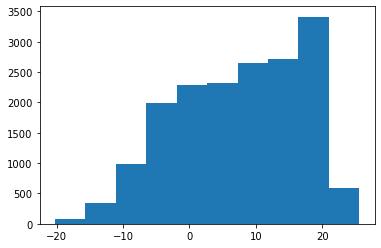

In [49]:
plt.hist(df_hourly['dew_point'])

(array([  4.,  23.,  45.,  86.,  93.,  93., 100.,  94., 131.,  61.]),
 array([-16.67056588, -12.6049651 ,  -8.53936431,  -4.47376353,
         -0.40816275,   3.65743804,   7.72303882,  11.7886396 ,
         15.85424038,  19.91984117,  23.98544195]),
 <BarContainer object of 10 artists>)

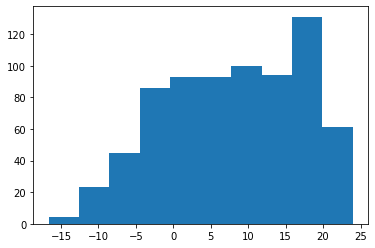

In [50]:
plt.hist(df_daily['dew_point'])

In [51]:
# Divide 'app_temp' (apparent temperature, or heat index) into categories: 
"""
– 0: 'below 0'
0 – 10: '0 to 10'
10 – 20: '10 to 20'
20 – 30: '20 to 30'
30 – : 'above 30'
"""

df_daily['app_temp_cat'] = df_daily['app_temp'].apply(lambda x: 'below -5' if x <= -5
                                                            else '-5 to 5' if x <= 5
                                                            else '5 to 15' if x <= 15
                                                            else '15 to 25' if x <= 25
                                                            else '25 to 35' if x <= 35
                                                            else '35 or higher')

df_hourly['app_temp_cat'] = df_hourly['app_temp'].apply(lambda x: 'below -5' if x <= -5
                                                            else '-5 to 5' if x <= 5
                                                            else '5 to 15' if x <= 15
                                                            else '15 to 25' if x <= 25
                                                            else '25 to 35' if x <= 35
                                                            else '35 or higher')



In [52]:
df_daily[df_daily['season'] == 'summer'].head()
df_hourly[df_hourly['season'] == 'summer'].head()

,date,season,year,month,hour,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat
3530,2011-06-01,summer,2011,6,0,no,wed,yes,clear,24.9,28.0,79.0,11.0,9,25,34,20.999064,25 to 35
3531,2011-06-01,summer,2011,6,1,no,wed,yes,clear,24.9,28.0,84.0,17.0,8,9,17,22.003448,25 to 35
3532,2011-06-01,summer,2011,6,2,no,wed,yes,clear,24.9,28.0,79.0,11.0,0,3,3,20.999064,25 to 35
3533,2011-06-01,summer,2011,6,3,no,wed,yes,clear,24.0,26.0,89.0,13.0,0,6,6,22.070151,25 to 35
3534,2011-06-01,summer,2011,6,4,no,wed,yes,misty,24.0,26.0,89.0,15.0,0,4,4,22.070151,25 to 35


In [53]:
df_daily['year_month'] = df_daily['date'].dt.to_period('M')
df_hourly['year_month'] = df_hourly['date'].dt.to_period('M')


In [54]:
df_daily.tail()
df_hourly.head()

,date,season,year,month,hour,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat,year_month
0,2011-01-01,winter,2011,1,0,no,sat,no,clear,3.3,3.0,81.0,0.0,3,13,16,0.355031,-5 to 5,2011-01
1,2011-01-01,winter,2011,1,1,no,sat,no,clear,2.3,2.0,80.0,0.0,8,32,40,-0.790695,-5 to 5,2011-01
2,2011-01-01,winter,2011,1,2,no,sat,no,clear,2.3,2.0,80.0,0.0,5,27,32,-0.790695,-5 to 5,2011-01
3,2011-01-01,winter,2011,1,3,no,sat,no,clear,3.3,3.0,75.0,0.0,3,10,13,-0.702688,-5 to 5,2011-01
4,2011-01-01,winter,2011,1,4,no,sat,no,clear,3.3,3.0,75.0,0.0,0,1,1,-0.702688,-5 to 5,2011-01


In [55]:
# Column with calendar_week

df_daily['calendar_week'] = df_daily['date'].dt.week

/var/folders/68/lmdx_4hd4msbstk8y2t5phyh0000gn/T/ipykernel_72131/2712438839.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_daily['calendar_week'] = df_daily['date'].dt.week


In [56]:
df_daily.head(3)

,date,season,year,month,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat,year_month,calendar_week
0,2011-01-01,winter,2011,1,no,sat,no,misty,8.2,8.0,80.6,10.7,331,654,985,5.063729,5 to 15,2011-01,52
1,2011-01-02,winter,2011,1,no,sun,no,misty,9.1,7.3,69.6,16.7,131,670,801,3.837369,5 to 15,2011-01,52
2,2011-01-03,winter,2011,1,no,mon,yes,clear,1.2,-3.5,43.7,16.6,120,1229,1349,-9.780283,-5 to 5,2011-01,1


In [57]:
# Check for missing rows in df_hourly

df_hourly['hour'].value_counts().sort_index()

0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: hour, dtype: int64

In [58]:
df_hourly_missing_vals = df_hourly['date'].value_counts().to_frame()
df_hourly_missing_vals = df_hourly_missing_vals.rename(columns = {'date':'num_vals'})
df_hourly_missing_vals['missing_vals'] = df_hourly_missing_vals['num_vals'].apply(lambda x: 24 - x)


In [59]:
# Dates in df_hourly with 1 or more missing rows
df_hourly_missing_vals[df_hourly_missing_vals['missing_vals'] != 0]

,num_vals,missing_vals
2011-01-05,23,1
2011-02-09,23,1
2011-10-19,23,1
2011-01-06,23,1
2012-11-29,23,1
...,...,...
2011-01-26,16,8
2011-01-18,12,12
2012-10-30,11,13
2011-01-27,8,16


In [60]:
# Dates in df_hourly with 2 or more missing rows
df_hourly_missing_vals[df_hourly_missing_vals['missing_vals'] > 1]

,num_vals,missing_vals
2011-01-03,22,2
2011-02-11,22,2
2011-03-10,22,2
2011-01-11,22,2
2011-02-28,22,2
2011-01-12,22,2
2011-08-27,18,6
2011-02-22,18,6
2011-08-28,17,7
2011-01-26,16,8


<h5> 2012-10-29 could be problematic. It only has hourly info for midnight (0:00) </h5>

In [61]:
df_hourly[df_hourly['date'] == '2012-10-29']

,date,season,year,month,hour,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat,year_month
15883,2012-10-29,autumn,2012,10,0,no,mon,yes,bit wet,12.7,13.0,88.0,24.0,2,20,22,10.762605,5 to 15,2012-10


<h5> 2011-01-27 could be problematic. It only has hourly info from 16:00 onwards </h5>

In [62]:
df_hourly[df_hourly['date'] == '2011-01-27']

,date,season,year,month,hour,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat,year_month
587,2011-01-27,winter,2011,1,16,no,thu,yes,clear,2.3,-1.0,55.0,13.0,1,23,24,-5.805196,-5 to 5,2011-01
588,2011-01-27,winter,2011,1,17,no,thu,yes,clear,2.3,-0.0,55.0,7.0,2,82,84,-5.805196,-5 to 5,2011-01
589,2011-01-27,winter,2011,1,18,no,thu,yes,clear,1.4,-1.0,69.0,6.0,3,101,104,-3.658245,-5 to 5,2011-01
590,2011-01-27,winter,2011,1,19,no,thu,yes,clear,1.4,-1.0,69.0,6.0,3,76,79,-3.658245,-5 to 5,2011-01
591,2011-01-27,winter,2011,1,20,no,thu,yes,clear,0.5,-2.0,74.0,6.0,4,55,59,-3.590324,-5 to 5,2011-01
592,2011-01-27,winter,2011,1,21,no,thu,yes,clear,0.5,-2.0,74.0,6.0,2,36,38,-3.590324,-5 to 5,2011-01
593,2011-01-27,winter,2011,1,22,no,thu,yes,clear,0.5,-2.0,74.0,6.0,0,27,27,-3.590324,-5 to 5,2011-01
594,2011-01-27,winter,2011,1,23,no,thu,yes,clear,0.5,-3.0,80.0,11.0,0,16,16,-2.544803,-5 to 5,2011-01


<h5> 2012-10-30 also has missing rows, but we still have rows from 1pm onwards, which isn't so bad </h5> <br>
However, the temperature values look corrupted. We have a bunch of "6.1"s, and a single "15.5". <br>
Could compare with 2012-10-29, 2012-10,28, 2012-10-31 and impute using average? <br>
But 2012-10-29 is also missing most of its rows. So will have to impute using 2012-10-28 and 2012-10-31

In [63]:
df_hourly[df_hourly['date'] == '2012-10-30']

,date,season,year,month,hour,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat,year_month
15884,2012-10-30,autumn,2012,10,13,no,tue,yes,bit wet,6.1,2.0,81.0,24.0,11,105,116,3.086630,-5 to 5,2012-10
15885,2012-10-30,autumn,2012,10,14,no,tue,yes,bit wet,6.1,2.0,81.0,24.0,8,118,126,3.086630,-5 to 5,2012-10
15886,2012-10-30,autumn,2012,10,15,no,tue,yes,bit wet,6.1,3.0,87.0,17.0,10,114,124,4.100131,-5 to 5,2012-10
15887,2012-10-30,autumn,2012,10,16,no,tue,yes,bit wet,6.1,3.0,87.0,17.0,15,83,98,4.100131,-5 to 5,2012-10
15888,2012-10-30,autumn,2012,10,17,no,tue,yes,bit wet,6.1,3.0,87.0,15.0,19,105,124,4.100131,-5 to 5,2012-10
15889,2012-10-30,autumn,2012,10,18,no,tue,yes,bit wet,6.1,4.0,87.0,9.0,4,139,143,4.100131,-5 to 5,2012-10
15890,2012-10-30,autumn,2012,10,19,no,tue,yes,misty,15.5,16.0,68.0,13.0,6,109,115,9.616938,15 to 25,2012-10
15891,2012-10-30,autumn,2012,10,20,no,tue,yes,misty,6.1,3.0,81.0,13.0,5,76,81,3.086630,-5 to 5,2012-10
15892,2012-10-30,autumn,2012,10,21,no,tue,yes,misty,6.1,5.0,87.0,7.0,4,60,64,4.100131,-5 to 5,2012-10
15893,2012-10-30,autumn,2012,10,22,no,tue,yes,clear,6.1,4.0,81.0,9.0,2,64,66,3.086630,-5 to 5,2012-10


In [64]:
df_hourly[df_hourly['date'] == '2012-10-29']

,date,season,year,month,hour,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat,year_month
15883,2012-10-29,autumn,2012,10,0,no,mon,yes,bit wet,12.7,13.0,88.0,24.0,2,20,22,10.762605,5 to 15,2012-10


In [65]:
df_hourly[df_hourly['date'] == '2012-10-28']

,date,season,year,month,hour,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat,year_month
15859,2012-10-28,autumn,2012,10,0,no,sun,no,bit wet,16.4,17.0,68.0,20.0,20,97,117,10.475530,15 to 25,2012-10
15860,2012-10-28,autumn,2012,10,1,no,sun,no,misty,15.5,16.0,72.0,19.0,22,111,133,10.471541,15 to 25,2012-10
15861,2012-10-28,autumn,2012,10,2,no,sun,no,misty,15.5,16.0,68.0,20.0,17,99,116,9.616938,15 to 25,2012-10
15862,2012-10-28,autumn,2012,10,3,no,sun,no,misty,15.5,16.0,63.0,22.0,18,61,79,8.484193,15 to 25,2012-10
15863,2012-10-28,autumn,2012,10,4,no,sun,no,misty,15.5,16.0,63.0,24.0,1,19,20,8.484193,15 to 25,2012-10
15864,2012-10-28,autumn,2012,10,5,no,sun,no,misty,15.5,16.0,63.0,20.0,6,22,28,8.484193,15 to 25,2012-10
15865,2012-10-28,autumn,2012,10,6,no,sun,no,misty,15.5,16.0,59.0,22.0,7,32,39,7.519521,15 to 25,2012-10
15866,2012-10-28,autumn,2012,10,7,no,sun,no,misty,15.5,16.0,59.0,20.0,17,48,65,7.519521,15 to 25,2012-10
15867,2012-10-28,autumn,2012,10,8,no,sun,no,misty,15.5,16.0,59.0,37.0,55,118,173,7.519521,15 to 25,2012-10
15868,2012-10-28,autumn,2012,10,9,no,sun,no,misty,15.5,16.0,55.0,28.0,124,206,330,6.495439,15 to 25,2012-10


In [66]:
df_hourly[df_hourly['date'] == '2012-10-31']

,date,season,year,month,hour,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat,year_month
15895,2012-10-31,autumn,2012,10,0,no,wed,yes,misty,6.1,5.0,81.0,7.0,0,16,16,3.086630,-5 to 5,2012-10
15896,2012-10-31,autumn,2012,10,1,no,wed,yes,misty,6.1,5.0,81.0,6.0,0,8,8,3.086630,-5 to 5,2012-10
15897,2012-10-31,autumn,2012,10,2,no,wed,yes,misty,6.1,4.0,81.0,9.0,0,7,7,3.086630,-5 to 5,2012-10
15898,2012-10-31,autumn,2012,10,3,no,wed,yes,misty,6.1,5.0,81.0,7.0,0,3,3,3.086630,-5 to 5,2012-10
15899,2012-10-31,autumn,2012,10,4,no,wed,yes,misty,6.1,3.0,87.0,13.0,0,5,5,4.100131,-5 to 5,2012-10
15900,2012-10-31,autumn,2012,10,5,no,wed,yes,misty,6.1,4.0,81.0,9.0,0,24,24,3.086630,-5 to 5,2012-10
15901,2012-10-31,autumn,2012,10,6,no,wed,yes,clear,6.1,4.0,81.0,11.0,0,116,116,3.086630,-5 to 5,2012-10
15902,2012-10-31,autumn,2012,10,7,no,wed,yes,misty,6.1,4.0,87.0,9.0,3,334,337,4.100131,-5 to 5,2012-10
15903,2012-10-31,autumn,2012,10,8,no,wed,yes,clear,7.0,6.0,81.0,9.0,6,615,621,3.964480,5 to 15,2012-10
15904,2012-10-31,autumn,2012,10,9,no,wed,yes,clear,8.0,6.0,76.0,9.0,17,280,297,4.029405,5 to 15,2012-10


Return to these missing values later. <br>
For now, save dataframes as they are (with basic cleaning and wrangling). 

In [67]:
df_daily.to_csv('cleaned_data/df_daily.csv')
df_hourly.to_csv('cleaned_data/df_hourly.csv')


In [68]:
df_daily.columns

Index(['date', 'season', 'year', 'month', 'holiday', 'day_of_week', 'work_day',
       'weather_sit', 'temp', 'app_temp', 'humidity', 'wind_speed', 'casual',
       'registered', 'total', 'dew_point', 'app_temp_cat', 'year_month',
       'calendar_week'],
      dtype='object')